In [8]:
from sklearn import datasets, model_selection, tree, metrics 
import matplotlib.pyplot as plt 
import graphviz
import numpy as np
import math 
from Handout_SkeletonDT.ID3 import ID3DecisionTreeClassifier
from collections import OrderedDict

# Load data and split train/test sets

In [2]:
data = datasets.load_digits()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(data.data, data.target, test_size = 0.3)

# 1. Decision tree classifier as packaged in sklearn

## Default parameters 

In [3]:
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

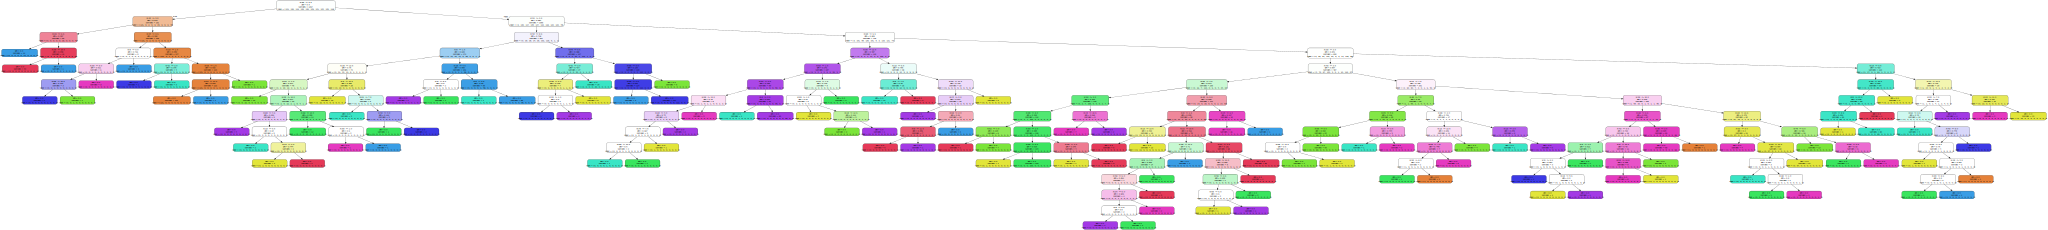

In [4]:
dot_data = tree.export_graphviz(clf, filled = True, rounded = True)  
graph = graphviz.Source(dot_data)  
graph 

In [5]:
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[52  0  0  0  0  1  1  0  0  0]
 [ 0 40  2  1  4  0  0  0  5  0]
 [ 0  4 47  0  0  0  0  1  5  1]
 [ 0  0  0 35  1  0  0  0  5  3]
 [ 0  5  0  0 45  0  0  1  0  0]
 [ 0  0  1  0  3 47  1  0  0  1]
 [ 0  4  0  1  2  1 52  0  0  0]
 [ 0  4  3  0  1  0  0 48  1  0]
 [ 0  0  3  0  0  2  1  2 41  0]
 [ 3  1  0  3  1  1  0  2  1 50]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.69      0.77      0.73        52
           2       0.84      0.81      0.82        58
           3       0.88      0.80      0.83        44
           4       0.79      0.88      0.83        51
           5       0.90      0.89      0.90        53
           6       0.95      0.87      0.90        60
           7       0.89      0.84      0.86        57
           8       0.71      0.84      0.77        49
           9       0.91      0.81      0.85        62

    accuracy                           0.85       540
   macro avg       

## Try different parameters

In [6]:
for min_num_samples in [1, 10, 15]:
    clf_new = tree.DecisionTreeClassifier(min_samples_leaf = min_num_samples).fit(X_train, y_train)
    y_pred = clf_new.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.75      0.79      0.77        52
           2       0.87      0.83      0.85        58
           3       0.79      0.75      0.77        44
           4       0.76      0.88      0.82        51
           5       0.85      0.89      0.87        53
           6       0.96      0.85      0.90        60
           7       0.86      0.84      0.85        57
           8       0.68      0.82      0.74        49
           9       0.94      0.81      0.87        62

    accuracy                           0.84       540
   macro avg       0.84      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.73      0.83      0.77        52
           2       0.76      0.78      0.77        58
           3       0.77 

# Part 2, implemented ID3 decision tree

## With pixel values as attributes

In [9]:
attributes = [('pixel_{}'.format(i + 1), np.arange(0, 16)) for i in np.arange(0, data.data.shape[-1])]
id3 = ID3DecisionTreeClassifier()
myTree = id3.fit(X_train, y_train, OrderedDict(attributes),data.target_names)
plot = id3.make_dot_data() 
plot.render('digit_tree_pixels')



/Users/rasmushelander/Documents/Kurser/Åk 5/Tillämpad ML /Labbar/EDAN95---Applied-Machine-Learning/Lab2/Handout_SkeletonDT/ID3.py:19: RuntimeWarning: invalid value encountered in true_divide
  p = [np.divide(np.sum([t == c for t in target]), len(target)) for c in classes]


'digit_tree_pixels.pdf'

In [10]:
y_pred = id3.predict(X_test, myTree)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[50  0  0  0  0  3  0  0  1  0]
 [ 0  6  5 30  1  0  2  1  6  1]
 [ 1  3 20 12  3  4  4  0  7  4]
 [ 0  3 14 11  2  0  0  1 10  3]
 [ 3  3  9 22  8  2  2  0  2  0]
 [ 4  7  6 14  4  4  6  0  4  4]
 [ 2  1 10 28  7  1  7  0  2  2]
 [ 0  1  2 40  2  0  1  9  2  0]
 [ 0  3  7 25  3  0  1  3  5  2]
 [ 0  3  7  9  3  5  3  0  5 27]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        54
           1       0.20      0.12      0.15        52
           2       0.25      0.34      0.29        58
           3       0.06      0.25      0.09        44
           4       0.24      0.16      0.19        51
           5       0.21      0.08      0.11        53
           6       0.27      0.12      0.16        60
           7       0.64      0.16      0.25        57
           8       0.11      0.10      0.11        49
           9       0.63      0.44      0.51        62

    accuracy                           0.27       540
   macro avg       

## Convert pixel values to dark, grey or light

In [11]:
def val_to_string(pixel_value): 
    if pixel_value < 5:
        return 'dark'
    elif pixel_value < 10:
        return 'grey'
    return 'light'

X_train_2 = [[val_to_string(val) for val in row] for row in X_train]
X_train_2 = np.array(X_train_2)
X_test_2 = [[val_to_string(val) for val in row] for row in X_test]
X_test_2 = np.array(X_test_2)

In [12]:
attributes_2 = [('pixel_{}'.format(i + 1), ('dark', 'grey', 'light')) for i in np.arange(0, data.data.shape[-1])]

In [13]:
id3 = ID3DecisionTreeClassifier()
myTree = id3.fit(X_train_2, y_train, OrderedDict(attributes_2), data.target_names)
plot = id3.make_dot_data() 
plot.render('digit_tree_colors')


/Users/rasmushelander/Documents/Kurser/Åk 5/Tillämpad ML /Labbar/EDAN95---Applied-Machine-Learning/Lab2/Handout_SkeletonDT/ID3.py:19: RuntimeWarning: invalid value encountered in true_divide
  p = [np.divide(np.sum([t == c for t in target]), len(target)) for c in classes]


'digit_tree_colors.pdf'

In [14]:
y_pred = id3.predict(X_test_2, myTree)
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[52  0  1  0  1  0  0  0  0  0]
 [ 0 34  1  0  3  1  2  1  6  4]
 [ 1  3 40  4  1  2  0  1  6  0]
 [ 0  0  1 31  1  3  0  2  1  5]
 [ 0  1  0  1 45  1  2  0  0  1]
 [ 1  0  1  0  1 46  1  1  0  2]
 [ 5  0  0  0  5  1 49  0  0  0]
 [ 2  0  1  3  4  0  1 39  7  0]
 [ 1  7  3  2  1  1  1  0 32  1]
 [ 1  0  2 12  5  2  0  1  0 39]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89        54
           1       0.76      0.65      0.70        52
           2       0.80      0.69      0.74        58
           3       0.58      0.70      0.64        44
           4       0.67      0.88      0.76        51
           5       0.81      0.87      0.84        53
           6       0.88      0.82      0.84        60
           7       0.87      0.68      0.76        57
           8       0.62      0.65      0.63        49
           9       0.75      0.63      0.68        62

    accuracy                           0.75       540
   macro avg       